<a href="https://colab.research.google.com/github/ArshHp/DeepLearning_Fundamentals/blob/main/Copy_of_Keras_ML_APM_COSO_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install vertica-python

In [ ]:
pip install pyodbc

In [ ]:
import pyodbc
import csv
import sys
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error    # For mean squared error evaluation
import math                                       # For doing maths calulations
from matplotlib import pyplot
from pandas import read_csv
import time
import vertica_python
from scipy import stats
import seaborn as sns
from datetime import date, timedelta
import fbprophet
from pandas import read_csv
from pandas import to_datetime
from fbprophet import Prophet
from pandas import DataFrame
import pandas as pd
from datetime import datetime
import pickle #Importing pickel libraries to save the model for future use
from sklearn.model_selection import train_test_split # Import train_test_split function
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model

In [ ]:
#df = pd.read_csv('bpm_data.csv')
#Read the dataset from GDrive
Inputfile = 'drive/My Drive/ML_files/bpm_data.csv'
df = pd.read_csv(Inputfile)
df.head()


,agent_id,agent_name,application_cmdb_global_id,application_cmdb_id,application_name,application_owner,client_device_id,client_device_name,collection_data_flow,collection_policy_name,collection_type,customer_id,customer_name,endusergroup_cmdb_id,endusergroup_name,location_cmdb_global_id,location_cmdb_id,location_name,producer_instance_id,producer_instance_type,received_in_downtime,script_id,script_name,server_ip,server_name,status_id,subnet_cmdb_id,subnet_end_ip,subnet_name,subnet_start_ip,tenant_id,timestamp_utc_s,txn_cmdb_global_id,txn_cmdb_id,txn_description,txn_instance_id,txn_name,txn_availability_status,txn_connection_time_ms,txn_connection_time_sum_ms,txn_critical_hits_count,txn_critical_threshold_ms,txn_dns_time_ms,txn_dns_time_sum_ms,txn_download_size_b,txn_download_time_ms,txn_download_time_sum_ms,txn_error_count,txn_flow_cmdb_global_id,txn_flow_cmdb_id,txn_flow_name,txn_minor_hits_count,txn_net_fb_time_ms,txn_net_firstbuffer_time_sum_ms,txn_net_time_ms,txn_net_time_sum_ms,txn_ok_hits_count,txn_outlier_threshold_ms,txn_page_component_count,txn_poor_threshold_ms,txn_response_time_ms,txn_retry_time_ms,txn_retry_time_sum_ms,txn_server_fb_time_ms,txn_server_fb_time_sum_ms,txn_ssl_time_ms,txn_ssl_time_sum_ms
0,6,opsb75,NaN,4c809d28-de58-f503-bc89-cd10f260785a,AOS Gateway,IT Department,NaN,NaN,Push,AOS_Cart_Load,Collection Service - Synthetic,1,Default Client,NaN,NaN,47d109ac-b859-0b29-896d-7e17c7bcb755,4b0d601b-5a23-d308-943c-470da014ce4a,India,opsb_synthetic_trans,BPM Probe,NaN,17,AOS_Cart_Load,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1628769201,NaN,4bd4d14f-ff18-3dec-a399-154c65632ec5,NaN,NaN,Add_Laptop_To_Cart,0.1,1.0,2.0,0.0,12000.0,NaN,NaN,756939.0,140.0,602.0,0,NaN,4cdbc239-a36b-c9a9-a251-7665b22e47a2,AOS_Cart_Load,0.0,179.0,1267.0,NaN,NaN,1.0,45000.0,15.0,8000.0,583,NaN,NaN,NaN,NaN,NaN,NaN
1,6,opsb75,NaN,4c809d28-de58-f503-bc89-cd10f260785a,AOS Gateway,IT Department,NaN,NaN,Push,AOS_Cart_Load,Collection Service - Synthetic,1,Default Client,NaN,NaN,47d109ac-b859-0b29-896d-7e17c7bcb755,4b0d601b-5a23-d308-943c-470da014ce4a,India,opsb_synthetic_trans,BPM Probe,NaN,17,AOS_Cart_Load,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1628770093,NaN,4bd4d14f-ff18-3dec-a399-154c65632ec5,NaN,NaN,Add_Laptop_To_Cart,0.1,1.0,1.0,0.0,12000.0,NaN,NaN,756938.0,163.0,581.0,0,NaN,4cdbc239-a36b-c9a9-a251-7665b22e47a2,AOS_Cart_Load,0.0,181.0,1184.0,NaN,NaN,1.0,45000.0,15.0,8000.0,583,NaN,NaN,NaN,NaN,NaN,NaN
2,6,opsb75,NaN,4c809d28-de58-f503-bc89-cd10f260785a,AOS Gateway,IT Department,NaN,NaN,Push,AOS_Cart_Load,Collection Service - Synthetic,1,Default Client,NaN,NaN,47d109ac-b859-0b29-896d-7e17c7bcb755,4b0d601b-5a23-d308-943c-470da014ce4a,India,opsb_synthetic_trans,BPM Probe,NaN,17,AOS_Cart_Load,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1628770995,NaN,4bd4d14f-ff18-3dec-a399-154c65632ec5,NaN,NaN,Add_Laptop_To_Cart,0.1,1.0,5.0,0.0,12000.0,NaN,NaN,756943.0,181.0,496.0,0,NaN,4cdbc239-a36b-c9a9-a251-7665b22e47a2,AOS_Cart_Load,0.0,205.0,1394.0,NaN,NaN,1.0,45000.0,15.0,8000.0,589,NaN,NaN,NaN,NaN,NaN,NaN
3,6,opsb75,NaN,4c809d28-de58-f503-bc89-cd10f260785a,AOS Gateway,IT Department,NaN,NaN,Push,AOS_Cart_Load,Collection Service - Synthetic,1,Default Client,NaN,NaN,47d109ac-b859-0b29-896d-7e17c7bcb755,4b0d601b-5a23-d308-943c-470da014ce4a,India,opsb_synthetic_trans,BPM Probe,NaN,17,AOS_Cart_Load,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1628771895,NaN,4bd4d14f-ff18-3dec-a399-154c65632ec5,NaN,NaN,Add_Laptop_To_Cart,0.1,1.0,5.0,0.0,12000.0,NaN,NaN,756938.0,119.0,486.0,0,NaN,4cdbc239-a36b-c9a9-a251-7665b22e47a2,AOS_Cart_Load,0.0,176.0,1093.0,NaN,NaN,1.0,45000.0,15.0,8000.0,568,NaN,NaN,NaN,NaN,NaN,NaN
4,6,opsb75,NaN,4c809d28-de58-f503-bc89-cd10f260785a,AOS Gateway,IT Department,NaN,NaN,Push,AOS_Cart_Load,Collection Service - Synthetic,1,Default Client,NaN,NaN,47d109ac-b859-0b29-896d-7e17c7bcb755,4b0d601b-5a23-d308-943c-470da014ce4a,India,opsb_synthetic_trans,BPM Probe,NaN,17,AOS_Cart_Load,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1628772786,NaN,4bd4d14f-ff18-3dec-a399-154c65632ec5,NaN,NaN,Add_Laptop_To_Cart,0.1,1.0,2

In [ ]:
df.head()

,agent_id,agent_name,application_cmdb_global_id,application_cmdb_id,application_name,application_owner,client_device_id,client_device_name,collection_data_flow,collection_policy_name,collection_type,customer_id,customer_name,endusergroup_cmdb_id,endusergroup_name,location_cmdb_global_id,location_cmdb_id,location_name,producer_instance_id,producer_instance_type,received_in_downtime,script_id,script_name,server_ip,server_name,status_id,subnet_cmdb_id,subnet_end_ip,subnet_name,subnet_start_ip,tenant_id,timestamp_utc_s,txn_cmdb_global_id,txn_cmdb_id,txn_description,txn_instance_id,txn_name,txn_availability_status,txn_connection_time_ms,txn_connection_time_sum_ms,txn_critical_hits_count,txn_critical_threshold_ms,txn_dns_time_ms,txn_dns_time_sum_ms,txn_download_size_b,txn_download_time_ms,txn_download_time_sum_ms,txn_error_count,txn_flow_cmdb_global_id,txn_flow_cmdb_id,txn_flow_name,txn_minor_hits_count,txn_net_fb_time_ms,txn_net_firstbuffer_time_sum_ms,txn_net_time_ms,txn_net_time_sum_ms,txn_ok_hits_count,txn_outlier_threshold_ms,txn_page_component_count,txn_poor_threshold_ms,txn_response_time_ms,txn_retry_time_ms,txn_retry_time_sum_ms,txn_server_fb_time_ms,txn_server_fb_time_sum_ms,txn_ssl_time_ms,txn_ssl_time_sum_ms
0,6,opsb75,NaN,4c809d28-de58-f503-bc89-cd10f260785a,AOS Gateway,IT Department,NaN,NaN,Push,AOS_Cart_Load,Collection Service - Synthetic,1,Default Client,NaN,NaN,47d109ac-b859-0b29-896d-7e17c7bcb755,4b0d601b-5a23-d308-943c-470da014ce4a,India,opsb_synthetic_trans,BPM Probe,NaN,17,AOS_Cart_Load,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1628769201,NaN,4bd4d14f-ff18-3dec-a399-154c65632ec5,NaN,NaN,Add_Laptop_To_Cart,0.1,1.0,2.0,0.0,12000.0,NaN,NaN,756939.0,140.0,602.0,0,NaN,4cdbc239-a36b-c9a9-a251-7665b22e47a2,AOS_Cart_Load,0.0,179.0,1267.0,NaN,NaN,1.0,45000.0,15.0,8000.0,583,NaN,NaN,NaN,NaN,NaN,NaN
1,6,opsb75,NaN,4c809d28-de58-f503-bc89-cd10f260785a,AOS Gateway,IT Department,NaN,NaN,Push,AOS_Cart_Load,Collection Service - Synthetic,1,Default Client,NaN,NaN,47d109ac-b859-0b29-896d-7e17c7bcb755,4b0d601b-5a23-d308-943c-470da014ce4a,India,opsb_synthetic_trans,BPM Probe,NaN,17,AOS_Cart_Load,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1628770093,NaN,4bd4d14f-ff18-3dec-a399-154c65632ec5,NaN,NaN,Add_Laptop_To_Cart,0.1,1.0,1.0,0.0,12000.0,NaN,NaN,756938.0,163.0,581.0,0,NaN,4cdbc239-a36b-c9a9-a251-7665b22e47a2,AOS_Cart_Load,0.0,181.0,1184.0,NaN,NaN,1.0,45000.0,15.0,8000.0,583,NaN,NaN,NaN,NaN,NaN,NaN
2,6,opsb75,NaN,4c809d28-de58-f503-bc89-cd10f260785a,AOS Gateway,IT Department,NaN,NaN,Push,AOS_Cart_Load,Collection Service - Synthetic,1,Default Client,NaN,NaN,47d109ac-b859-0b29-896d-7e17c7bcb755,4b0d601b-5a23-d308-943c-470da014ce4a,India,opsb_synthetic_trans,BPM Probe,NaN,17,AOS_Cart_Load,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1628770995,NaN,4bd4d14f-ff18-3dec-a399-154c65632ec5,NaN,NaN,Add_Laptop_To_Cart,0.1,1.0,5.0,0.0,12000.0,NaN,NaN,756943.0,181.0,496.0,0,NaN,4cdbc239-a36b-c9a9-a251-7665b22e47a2,AOS_Cart_Load,0.0,205.0,1394.0,NaN,NaN,1.0,45000.0,15.0,8000.0,589,NaN,NaN,NaN,NaN,NaN,NaN
3,6,opsb75,NaN,4c809d28-de58-f503-bc89-cd10f260785a,AOS Gateway,IT Department,NaN,NaN,Push,AOS_Cart_Load,Collection Service - Synthetic,1,Default Client,NaN,NaN,47d109ac-b859-0b29-896d-7e17c7bcb755,4b0d601b-5a23-d308-943c-470da014ce4a,India,opsb_synthetic_trans,BPM Probe,NaN,17,AOS_Cart_Load,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1628771895,NaN,4bd4d14f-ff18-3dec-a399-154c65632ec5,NaN,NaN,Add_Laptop_To_Cart,0.1,1.0,5.0,0.0,12000.0,NaN,NaN,756938.0,119.0,486.0,0,NaN,4cdbc239-a36b-c9a9-a251-7665b22e47a2,AOS_Cart_Load,0.0,176.0,1093.0,NaN,NaN,1.0,45000.0,15.0,8000.0,568,NaN,NaN,NaN,NaN,NaN,NaN
4,6,opsb75,NaN,4c809d28-de58-f503-bc89-cd10f260785a,AOS Gateway,IT Department,NaN,NaN,Push,AOS_Cart_Load,Collection Service - Synthetic,1,Default Client,NaN,NaN,47d109ac-b859-0b29-896d-7e17c7bcb755,4b0d601b-5a23-d308-943c-470da014ce4a,India,opsb_synthetic_trans,BPM Probe,NaN,17,AOS_Cart_Load,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1628772786,NaN,4bd4d14f-ff18-3dec-a399-154c65632ec5,NaN,NaN,Add_Laptop_To_Cart,0.1,1.0,2

In [ ]:
df.describe()

,agent_id,client_device_id,client_device_name,customer_id,endusergroup_cmdb_id,endusergroup_name,received_in_downtime,script_id,server_ip,server_name,status_id,subnet_cmdb_id,subnet_end_ip,subnet_name,subnet_start_ip,tenant_id,timestamp_utc_s,txn_description,txn_instance_id,txn_availability_status,txn_connection_time_ms,txn_connection_time_sum_ms,txn_critical_hits_count,txn_critical_threshold_ms,txn_dns_time_ms,txn_dns_time_sum_ms,txn_download_size_b,txn_download_time_ms,txn_download_time_sum_ms,txn_error_count,txn_minor_hits_count,txn_net_fb_time_ms,txn_net_firstbuffer_time_sum_ms,txn_net_time_ms,txn_net_time_sum_ms,txn_ok_hits_count,txn_outlier_threshold_ms,txn_page_component_count,txn_poor_threshold_ms,txn_response_time_ms,txn_retry_time_ms,txn_retry_time_sum_ms,txn_server_fb_time_ms,txn_server_fb_time_sum_ms,txn_ssl_time_ms,txn_ssl_time_sum_ms
count,182500.0,0.0,0.0,182500.0,0.0,0.0,0.0,182500.000000,0.0,0.0,182500.000000,0.0,0.0,0.0,0.0,0.0,1.825000e+05,0.0,0.0,182500.000000,176357.000000,176357.000000,182433.000000,182500.000000,17344.000000,17344.000000,1.823790e+05,176357.000000,176357.000000,182500.000000,182433.000000,86945.000000,86945.000000,0.0,0.0,182433.000000,182500.0,182433.000000,182500.000000,182500.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,6.0,NaN,NaN,1.0,NaN,NaN,NaN,15.257353,NaN,NaN,0.002904,NaN,NaN,NaN,NaN,NaN,1.631568e+09,NaN,NaN,0.099465,1.235454,2.322159,0.084316,12558.109589,10.007322,13.514933,1.302235e+06,132.257841,400.060962,0.000663,0.040393,3500.687998,5174.404647,NaN,NaN,0.874792,45000.0,11.663235,8515.178082,2819.269989,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,NaN,NaN,0.0,NaN,NaN,NaN,1.695429,NaN,NaN,0.119645,NaN,NaN,NaN,NaN,NaN,2.057795e+06,NaN,NaN,0.022406,70.734957,71.551482,0.277862,2635.142576,75.035244,82.125006,1.918220e+06,196.165918,565.689193,0.025741,0.196879,5163.134649,7131.877388,NaN,NaN,0.330955,0.0,16.648239,2432.439300,4607.417484,NaN,NaN,NaN,NaN,NaN,NaN
min,6.0,NaN,NaN,1.0,NaN,NaN,NaN,13.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,1.627545e+09,NaN,NaN,-0.900000,0.000000,0.000000,0.000000,12000.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,7.000000,7.000000,NaN,NaN,0.000000,45000.0,0.000000,8000.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,6.0,NaN,NaN,1.0,NaN,NaN,NaN,14.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,1.629838e+09,NaN,NaN,0.100000,0.000000,0.000000,0.000000,12000.000000,1.000000,2.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,159.000000,449.000000,NaN,NaN,1.000000,45000.0,0.000000,8000.000000,280.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,6.0,NaN,NaN,1.0,NaN,NaN,NaN,15.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,1.631552e+09,NaN,NaN,0.100000,0.000000,0.000000,0.000000,12000.000000,2.000000,3.000000,2.683840e+05,0.000000,0.000000,0.000000,0.000000,655.000000,1789.000000,NaN,NaN,1.000000,45000.0,7.000000,8000.000000,584.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,6.0,NaN,NaN,1.0,NaN,NaN,NaN,17.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,1.633268e+09,NaN,NaN,0.100000,1.000000,1.000000,0.000000,12000.000000,3.000000,4.000000,1.830872e+06,251.000000,952.000000,0.000000,0.000000,11088.000000,13443.000000,NaN,NaN,1.000000,45000.0,18.000000,8000.000000,4024.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,6.0,NaN,NaN,1.0,NaN,NaN,NaN,18.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,1.635234e+09,NaN,NaN,0.100000,8999.000000,9000.000000,1.000000,25000.000000,7025.000000,7027.000000,5.943445e+06,14741.000000,17949.000000,1.000000,1.000000,45550.000000,166105.000000,NaN,NaN,1.000000,45000.0,60.000000,20000.000000,127832.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Drop unwanted columns
df.columns

Index(['agent_id', 'agent_name', 'application_cmdb_global_id',
       'application_cmdb_id', 'application_name', 'application_owner',
       'client_device_id', 'client_device_name', 'collection_data_flow',
       'collection_policy_name', 'collection_type', 'customer_id',
       'customer_name', 'endusergroup_cmdb_id', 'endusergroup_name',
       'location_cmdb_global_id', 'location_cmdb_id', 'location_name',
       'producer_instance_id', 'producer_instance_type',
       'received_in_downtime', 'script_id', 'script_name', 'server_ip',
       'server_name', 'status_id', 'subnet_cmdb_id', 'subnet_end_ip',
       'subnet_name', 'subnet_start_ip', 'tenant_id', 'timestamp_utc_s',
       'txn_cmdb_global_id', 'txn_cmdb_id', 'txn_description',
       'txn_instance_id', 'txn_name', 'txn_availability_status',
       'txn_connection_time_ms', 'txn_connection_time_sum_ms',
       'txn_critical_hits_count', 'txn_critical_threshold_ms',
       'txn_dns_time_ms', 'txn_dns_time_sum_ms', 'txn_downlo

In [ ]:
df_new = df.drop(['agent_id', 'application_cmdb_global_id',
       'application_cmdb_id', 'application_owner',
       'client_device_id', 'client_device_name', 'collection_data_flow',
       'collection_type', 'customer_id',
       'customer_name', 'endusergroup_cmdb_id', 'endusergroup_name',
       'location_cmdb_global_id', 'location_cmdb_id', 'location_name',
       'producer_instance_id', 'producer_instance_type',
       'received_in_downtime', 'script_id', 'script_name', 'server_ip',
       'server_name', 'status_id', 'subnet_cmdb_id', 'subnet_end_ip',
       'subnet_name', 'subnet_start_ip', 'tenant_id',
       'txn_cmdb_global_id', 'txn_cmdb_id', 'txn_description',
       'txn_connection_time_ms', 'txn_connection_time_sum_ms',
       'txn_critical_hits_count', 'txn_critical_threshold_ms',
       'txn_dns_time_ms', 'txn_dns_time_sum_ms', 'txn_download_size_b',
       'txn_download_time_ms', 'txn_download_time_sum_ms', 'txn_error_count',
       'txn_flow_cmdb_global_id', 'txn_flow_cmdb_id', 'txn_flow_name',
       'txn_minor_hits_count', 'txn_net_fb_time_ms',
       'txn_net_firstbuffer_time_sum_ms', 'txn_net_time_ms',
       'txn_net_time_sum_ms', 'txn_ok_hits_count', 'txn_outlier_threshold_ms',
       'txn_page_component_count', 'txn_poor_threshold_ms',
       'txn_retry_time_ms', 'txn_retry_time_sum_ms',
       'txn_server_fb_time_ms', 'txn_server_fb_time_sum_ms', 'txn_ssl_time_ms',
       'txn_ssl_time_sum_ms','txn_instance_id'],axis=1)

In [ ]:
#Check for null values if available in dataset
df_new.isnull().sum()

agent_name                 0
application_name           0
collection_policy_name     0
timestamp_utc_s            0
txn_name                   0
txn_availability_status    0
txn_response_time_ms       0
dtype: int64

In [ ]:
df_new.head(2)

,agent_name,application_name,collection_policy_name,timestamp_utc_s,txn_name,txn_availability_status,txn_response_time_ms
0,opsb75,AOS Gateway,AOS_Cart_Load,1628769201,Add_Laptop_To_Cart,0.1,583
1,opsb75,AOS Gateway,AOS_Cart_Load,1628770093,Add_Laptop_To_Cart,0.1,583


In [ ]:
df_new.columns

Index(['agent_name', 'application_name', 'collection_policy_name',
       'timestamp_utc_s', 'txn_name', 'txn_availability_status',
       'txn_response_time_ms'],
      dtype='object')

In [ ]:
df_new.shape

(182500, 7)

In [ ]:
df_new.txn_name.unique() #List the set of node for CPU Monitoring 

array(['Add_Laptop_To_Cart', 'Add_Speakers_To_Cart',
       'Checkout_To_Payment', 'Browse_Items', 'Login_Website',
       'Select_Items', 'Add_Headphones_To_Cart', 'Open_WebPage'],
      dtype=object)

In [ ]:
df_checkout = df_new[df_new['txn_name'] == 'Checkout_To_Payment']
df_checkout.shape

(22783, 7)

In [ ]:
df_checkout.head(2)


,agent_name,application_name,collection_policy_name,timestamp_utc_s,txn_name,txn_availability_status,txn_response_time_ms
8429,opsb75,AOS Gateway,AOS_Cart_Load,1628769202,Checkout_To_Payment,0.1,106
8430,opsb75,AOS Gateway,AOS_Cart_Load,1628770094,Checkout_To_Payment,0.1,99


In [ ]:
#print (time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(1619893855)))
new_timestamp = []
for index, row in df_checkout.iterrows():
    new_timestamp = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(row['timestamp_utc_s']))
    #print (new_timestamp)   
    df_checkout.at[index,'Timestamp']=new_timestamp  #Changed due to version difference 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_checkout.head(5)

,agent_name,application_name,collection_policy_name,timestamp_utc_s,txn_name,txn_availability_status,txn_response_time_ms,Timestamp
8429,opsb75,AOS Gateway,AOS_Cart_Load,1628769202,Checkout_To_Payment,0.1,106,2021-08-12 11:53:22
8430,opsb75,AOS Gateway,AOS_Cart_Load,1628770094,Checkout_To_Payment,0.1,99,2021-08-12 12:08:14
8431,opsb75,AOS Gateway,AOS_Cart_Load,1628770996,Checkout_To_Payment,0.1,99,2021-08-12 12:23:16
8432,opsb75,AOS Gateway,AOS_Cart_Load,1628771896,Checkout_To_Payment,0.1,109,2021-08-12 12:38:16
8433,opsb75,AOS Gateway,AOS_Cart_Load,1628772787,Checkout_To_Payment,0.1,98,2021-08-12 12:53:07


In [ ]:
#Convert to datetime datatype
df_checkout['Timestamp'] = pd.to_datetime(df_checkout['Timestamp'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_checkout.columns

Index(['agent_name', 'application_name', 'collection_policy_name',
       'timestamp_utc_s', 'txn_name', 'txn_availability_status',
       'txn_response_time_ms', 'Timestamp'],
      dtype='object')

In [ ]:
df_checkout.tail(2)

,agent_name,application_name,collection_policy_name,timestamp_utc_s,txn_name,txn_availability_status,txn_response_time_ms,Timestamp
182496,opsb75,AOS Web Shop Monaco,AOS_Cart_Load,1635233284,Checkout_To_Payment,0.1,155,2021-10-26 07:28:04
182499,opsb75,AOS Web Shop New Delhi,AOS_Cart_Load,1635233934,Checkout_To_Payment,0.1,128,2021-10-26 07:38:54


In [ ]:
df_checkout.agent_name.unique() #Validate for single BPM agent data only 

array(['opsb75'], dtype=object)

In [ ]:
df_checkout = df_checkout.drop(['timestamp_utc_s'],axis=1)

In [ ]:
df_checkout = df_checkout[['Timestamp', 'txn_response_time_ms']]

In [ ]:
df_checkout.to_csv("bpm_cleaned_data.csv",index=False)

In [ ]:
df_checkout.shape

(22783, 2)

In [ ]:
df_checkout.tail(2)


,Timestamp,txn_response_time_ms
182496,2021-10-26 07:28:04,155
182499,2021-10-26 07:38:54,128


In [ ]:
df_process = pd.read_csv('bpm_cleaned_data.csv')

In [ ]:
df_process.head(2)

,Timestamp,txn_response_time_ms
0,2021-08-12 11:53:22,106
1,2021-08-12 12:08:14,99


In [ ]:
#Check for unrealistic values like response time as null or 0 or less than 0
#Get the list of records having 0 as response time
df_process.drop(df_process[df_process['txn_response_time_ms'] <= 0].index, inplace = True)
    
    

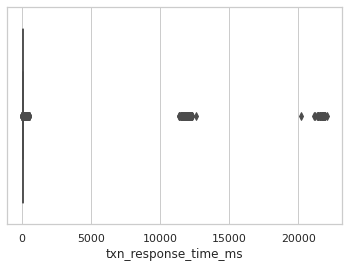

In [ ]:
#Remove Outliers
sns.set(style="whitegrid")
sns.boxplot(x=df_process['txn_response_time_ms'])

In [ ]:
Q1 = df_process['txn_response_time_ms'].quantile(0.25)
Q3 = df_process['txn_response_time_ms'].quantile(0.75)
IQR = Q3 - Q1
print("Inter Quartile Range :",IQR)


Inter Quartile Range : 12.0


In [ ]:
threshold = 3
mean = np.mean(df_process['txn_response_time_ms'])
std = np.std(df_process['txn_response_time_ms'])
outlier = []
count=0
datetime = []
response = []
print ('Dataset size of outlier check',len(df_process['txn_response_time_ms']))
#for i in df_login['txn_response_time_ms']:
for idx, row in df_process.iterrows():
    i=row['txn_response_time_ms']
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
        count=count+1
    else:
        datetime.append(row['Timestamp'])
        response.append(row['txn_response_time_ms'])   
        
#Consider this data for further processing ,create outlier free dataset
df_out = pd.DataFrame(datetime,columns=['Timestamp'])
df_out['txn_response_time_ms']=response
#print(df_out.head())
print ('Total Outliers :', count)
#print('outlier in dataset is', outlier)
print ("Total output dataset ", df_out.shape)

Dataset size of outlier check 22775
Total Outliers : 153
Total output dataset  (22622, 2)


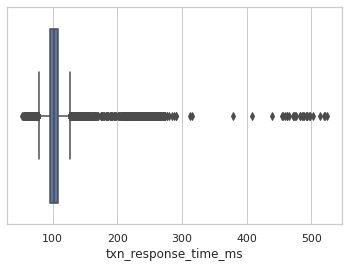

In [ ]:
#Remove Outliers
sns.set(style="whitegrid")
sns.boxplot(x=df_out['txn_response_time_ms'])


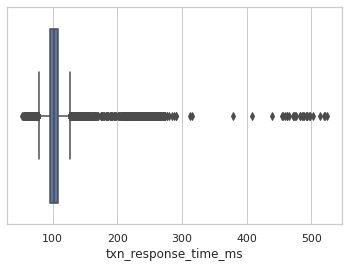

In [ ]:
#Remove Outliers
df_out1 = df_out #Ignoring second outlier detection
sns.set(style="whitegrid")
sns.boxplot(x=df_out1['txn_response_time_ms'])

In [ ]:
df_out1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22622 entries, 0 to 22621
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Timestamp             22622 non-null  object
 1   txn_response_time_ms  22622 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 353.6+ KB


In [ ]:
DAYS_FOR_TEST = 5
from datetime import datetime
new_timestamp = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime())
print ("Model is running at          : ",new_timestamp )

#What if data stopped well before the current date , handle it now 
#dt = pd.Timestamp(date.today() - timedelta(DAYS_FOR_TEST))

#print ("Last record for given dataset", df_out1['Timestamp'].tail(1))
lastrecord = df_out1['Timestamp'].tail(1).to_string(index=False)
lastrecord = lastrecord.strip()
lastdate = datetime.strptime(lastrecord,'%Y-%m-%d %H:%M:%S')
print ("Last record found in dataset : ",lastdate)
dt = lastdate - timedelta(DAYS_FOR_TEST)
print("Days considered for test data: ",DAYS_FOR_TEST)
print ("Training data starts from    : ",df_out1['Timestamp'].head(1).to_string(index=False))
print("Test data starts from        : ",dt)

# splitting the dataframe into 2 parts
# on basis of 'Timestamp' column values

#Get training & test dataset

#Convert to datetime datatype
df_out1['Timestamp'] = pd.to_datetime(df_out1['Timestamp'])


mask = df_out1['Timestamp'] < dt
df_train = df_out1[mask]
print ("Complete Dataset", df_out1.shape)

print ("Training Dataset",df_train.shape)  
# invert the boolean values
df_test = df_out1[~mask]
  
# printing df1
print ("Test Dataset", df_test.shape)


Model is running at          :  2021-10-31 11:03:06
Last record found in dataset :  2021-10-26 07:38:54
Days considered for test data:  5
Training data starts from    :   2021-08-12 11:53:22
Test data starts from        :  2021-10-21 07:38:54
Complete Dataset (22622, 2)
Training Dataset (21521, 2)
Test Dataset (1101, 2)


In [ ]:
df_train.shape

(21521, 2)

In [ ]:
df_test.shape

(1101, 2)

In [ ]:
df_train.to_csv("drive/My Drive/ML_files/Training_dataset.csv",index=False)
df_test.to_csv("drive/My Drive/ML_files/Test_dataset.csv",index=False)

#df_train.to_csv("Training_dataset.csv",index=False)
#df_test.to_csv("Test_dataset.csv",index=False)

In [ ]:
# load data
#Read the dataset from GDrive
#Inputfile = 'Training_dataset.csv'
Inputfile = 'drive/My Drive/ML_files/Training_dataset.csv'
df = pd.read_csv(Inputfile)

#df = pd.read_csv('Training_dataset.csv')

df.head()
# summarize shape
print(df.shape)
# show first few rows
df = df[['Timestamp', 'txn_response_time_ms']]
df['Timestamp']=pd.to_datetime(df['Timestamp'])
print(df.head())

(21521, 2)
            Timestamp  txn_response_time_ms
0 2021-08-12 11:53:22                   106
1 2021-08-12 12:08:14                    99
2 2021-08-12 12:23:16                    99
3 2021-08-12 12:38:16                   109
4 2021-08-12 12:53:07                    98


In [ ]:
df = df.drop(columns=['Timestamp'],axis=1)


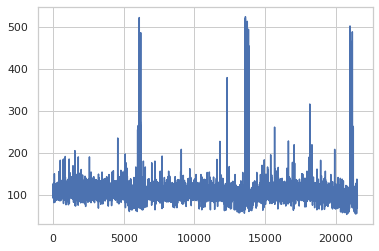

In [ ]:
pyplot.plot(df)
pyplot.show()

In [ ]:
# fix random seed for reproducibility
np.random.seed(7)

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. We can easily normalize the dataset using the MinMaxScaler preprocessing class from the scikit-learn library.

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)


With time series data, the sequence of values is important. A simple method that we can use is to split the ordered dataset into train and test datasets. The code below calculates the index of the split point and separates the data into the training datasets with 67% of the observations that we can use to train our model, leaving the remaining 33% for testing the model.

In [ ]:
# split into train and test sets
train_size = int(len(df) * 0.67)
test_size = len(df) - train_size
print ("Total datasize: ", len(df))
print ("Train Size    : ",train_size)
print ("Test Size     : ",test_size)
train, test = df[0:train_size,:], df[train_size:len(df),:]
#print(len(train), len(test))

Total datasize:  21521
Train Size    :  14419
Test Size     :  7102


Now we can define a function to create a new dataset, as described above.

The function takes two arguments: the dataset, which is a NumPy array that we want to convert into a dataset, and the look_back, which is the number of previous time steps to use as input variables to predict the next time period — in this case defaulted to 1.

This default will create a dataset where X is the number of passengers at a given time (t) and Y is the number of passengers at the next time (t + 1).

It can be configured, and we will by constructing a differently shaped dataset in the next section.

Source:
https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

The LSTM network expects the input data (X) to be provided with a specific array structure in the form of: [samples, time steps, features].

Currently, our data is in the form: [samples, features] and we are framing the problem as one time step for each sample. We can transform the prepared train and test input data into the expected structure using numpy.reshape() as follows:

In [ ]:
# reshape input to be [samples, time steps, features]
#trainX = np.reshape(trainX, (trainX.shape[0], 1,trainX.shape[1]))
#testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


#Using time steps 
#Reshape training data into <total length>,<timesteps>,<Total features in data> format
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

print (trainX.shape[0])
print(trainX.shape[1])
print (trainX.shape)

14417
1
(14417, 1, 1)


We are now ready to design and fit our LSTM network for this problem.

The network has a visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons, and an output layer that makes a single value prediction. The default sigmoid activation function is used for the LSTM blocks. The network is trained for 100 epochs and a batch size of 1 is used.

In [ ]:
#create and fit the LSTM network
#network has a visible layer with 1 input.
#A hidden layer with 4 LSTM blocks or neurons, 
#An output layer that makes a single value prediction. 
#The default sigmoid activation function is used for the LSTM blocks. The network is trained for 10-100 epochs and a batch size of 1 is used.
batch_size = 1
lstm_model = Sequential()
#model.add(LSTM(4, input_shape=(look_back,1)))
#model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
lstm_model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True)) #Stacked LSTMs with Memory Between Batches
lstm_model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(5):
    lstm_model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    lstm_model.reset_states() #To get stateful LSTM 

14417/14417 - 64s - loss: 0.0021
14417/14417 - 56s - loss: 0.0020
14417/14417 - 56s - loss: 0.0020
14417/14417 - 55s - loss: 0.0020
14417/14417 - 55s - loss: 0.0020


Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).

In [ ]:
# make predictions
trainPredict = lstm_model.predict(trainX,batch_size=batch_size)
testPredict = lstm_model.predict(testX,batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.4f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.4f RMSE' % (testScore))

Train Score: 25.2464 RMSE
Test Score: 24.8509 RMSE


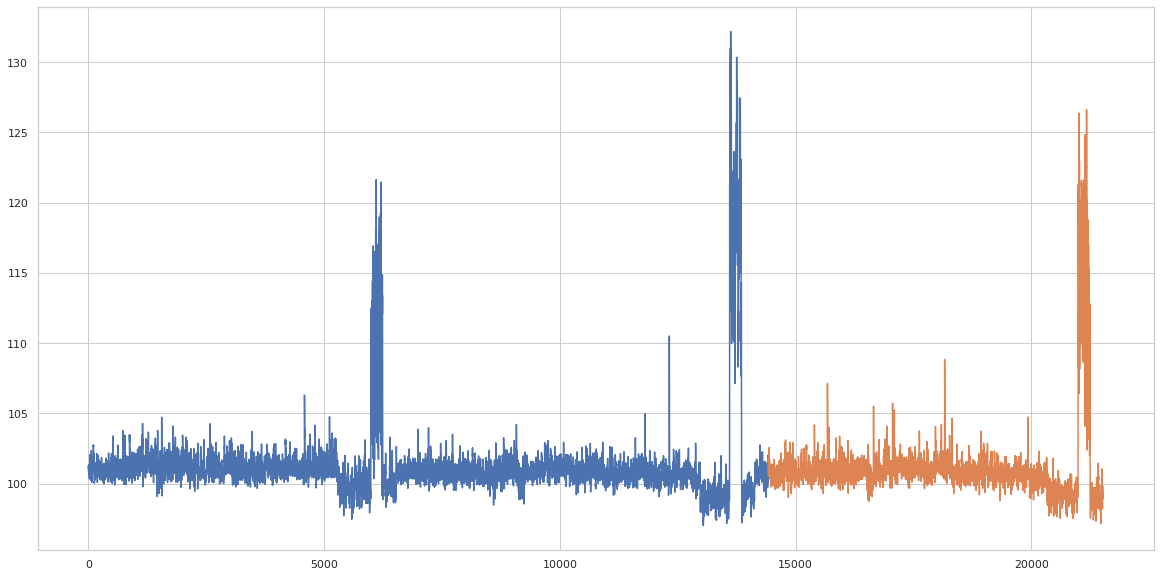

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df)-1, :] = testPredict
# plot baseline and predictions
pyplot.figure(figsize=(20,10))
#pyplot.plot(scaler.inverse_transform(df))
pyplot.plot(trainPredictPlot)
pyplot.plot(testPredictPlot)
pyplot.show()

In [ ]:
# now to save the model as serialized object pickle
Outfile = 'drive/My Drive/ML_files/5.0_BPM_LSTM_Model.h5'
#Outfile = "5.0_BPM_LSTM_Model.h5"
#lstm_model.save(Outfile)
with open(Outfile, 'wb') as model:
  pickle.dump(lstm_model,model)

#Outfile = '5.0_BPM_LSTM_Model'
#with open(Outfile, 'wb') as model:
 #   pickle.dump(lstm_model,model)



TypeError: ignored

In [ ]:
#Testing the saved model
# identical to the previous one
model = load_model(Outfile)

OSError: ignored

In [ ]:
print(keras.__version__)